<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




In [ ]:
# Install the required libraries
!pip install -U scikit-learn
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

## Import the required libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV, ElasticNetCV 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore', module='sklearn')

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [2]:
data = pd.read_csv('Store_CA.csv')
data.head()

,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,StoreLocation,StoreCategory,MonthlySalesRevenue
0,581,29,1723,186,84.9,1,12,6,108.3,Los Angeles,Electronics,284.90
1,382,31,1218,427,75.8,18,11,6,97.8,Los Angeles,Electronics,308.21
2,449,35,2654,142,92.8,14,11,6,101.1,Los Angeles,Grocery,292.11
3,666,9,2591,159,66.3,11,11,4,115.1,Sacramento,Clothing,279.61
4,657,35,2151,275,89.1,28,12,7,93.4,Palo Alto,Electronics,359.71


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


The dataset for this project was collected from kaggle: Retail Store Performance. This dataset provides a comprehensive collection of key performance indicators (KPIs) for retail stores, offering insights into factors influencing store performance, customer engagement, and financial outcomes. 

#### Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ProductVariety       1650 non-null   int64  
 1   MarketingSpend       1650 non-null   int64  
 2   CustomerFootfall     1650 non-null   int64  
 3   StoreSize            1650 non-null   int64  
 4   EmployeeEfficiency   1650 non-null   float64
 5   StoreAge             1650 non-null   int64  
 6   CompetitorDistance   1650 non-null   int64  
 7   PromotionsCount      1650 non-null   int64  
 8   EconomicIndicator    1650 non-null   float64
 9   StoreLocation        1650 non-null   object 
 10  StoreCategory        1650 non-null   object 
 11  MonthlySalesRevenue  1650 non-null   float64
dtypes: float64(3), int64(7), object(2)
memory usage: 154.8+ KB


In [4]:
data.isnull().sum()

ProductVariety         0
MarketingSpend         0
CustomerFootfall       0
StoreSize              0
EmployeeEfficiency     0
StoreAge               0
CompetitorDistance     0
PromotionsCount        0
EconomicIndicator      0
StoreLocation          0
StoreCategory          0
MonthlySalesRevenue    0
dtype: int64

**StoreSize:** The physical size of the store in square meters.    
**MarketingSpend:** Monthly expenditure on marketing activities, measured in thousands of dollars.                                               
**CustomerFootfall:** The total number of customers visiting the store each month.                                                                      
**ProductVariety:** The number of unique products available in the store.                                               
**EmployeeEfficiency:** Average efficiency score of employees, scaled from 0 to 100.                                              
**StoreAge:** The number of years the store has been in operation.                                                       
**CompetitorDistance:** Distance to the nearest competitor in kilometers.                                                    
**PromotionsCount:** The number of promotional events conducted by the store monthly.                                                    
**EconomicIndicator:** A regional economic activity index reflecting local market conditions.                                                    
**StoreLocation:** The city or region where the store is located.                                                    
**StoreCategory:** The type of store (e.g., "Grocery," "Electronics," or "Clothing").                                                    
**MonthlySalesRevenue:** Total monthly sales revenue, measured in thousands of dollars.                                                    

In [5]:
data.rename(columns={'StoreSize': 'StoreSize (m2)', 
                     'MarketingSpend': 'MarketingSpend (x1000 dollars)',
                     'StoreAge': 'StoreAge (years)',
                     'CustomerFootfall': 'CustomerFootfall (customer/month)',
                     'ProductVariety': 'ProductVariety (un.)',
                     'EmployeeEfficiency': 'EmployeeEfficiency (0 to 100)',
                     'CompetitorDistance': 'CompetitorDistance (km)'}, inplace=True)

In [6]:
store_locations = data['StoreLocation'].unique()
print("Store Locations:", store_locations)

Store Locations: ['Los Angeles' 'Sacramento' 'Palo Alto' 'San Francisco']


In [7]:
store_categories = data['StoreCategory'].unique()
print("Store Categories:", store_categories)

Store Categories: ['Electronics' 'Grocery' 'Clothing']


In [8]:
label_encoder_location = LabelEncoder()
label_encoder_category = LabelEncoder()

data['StoreLocationEncoded'] = label_encoder_location.fit_transform(data['StoreLocation'])
data['StoreCategoryEncoded'] = label_encoder_category.fit_transform(data['StoreCategory'])

print("StoreLocation Mapping:", dict(zip(label_encoder_location.classes_, label_encoder_location.transform(label_encoder_location.classes_))))
print("StoreCategory Mapping:", dict(zip(label_encoder_category.classes_, label_encoder_category.transform(label_encoder_category.classes_))))

StoreLocation Mapping: {'Los Angeles': 0, 'Palo Alto': 1, 'Sacramento': 2, 'San Francisco': 3}
StoreCategory Mapping: {'Clothing': 0, 'Electronics': 1, 'Grocery': 2}


In [9]:
data.drop(['StoreLocation', 'StoreCategory'], axis=1, inplace=True)

In [10]:
data.head()

,ProductVariety (un.),MarketingSpend (x1000 dollars),CustomerFootfall (customer/month),StoreSize (m2),EmployeeEfficiency (0 to 100),StoreAge (years),CompetitorDistance (km),PromotionsCount,EconomicIndicator,MonthlySalesRevenue,StoreLocationEncoded,StoreCategoryEncoded
0,581,29,1723,186,84.9,1,12,6,108.3,284.90,0,1
1,382,31,1218,427,75.8,18,11,6,97.8,308.21,0,1
2,449,35,2654,142,92.8,14,11,6,101.1,292.11,0,2
3,666,9,2591,159,66.3,11,11,4,115.1,279.61,2,0
4,657,35,2151,275,89.1,28,12,7,93.4,359.71,1,1


<Axes: >

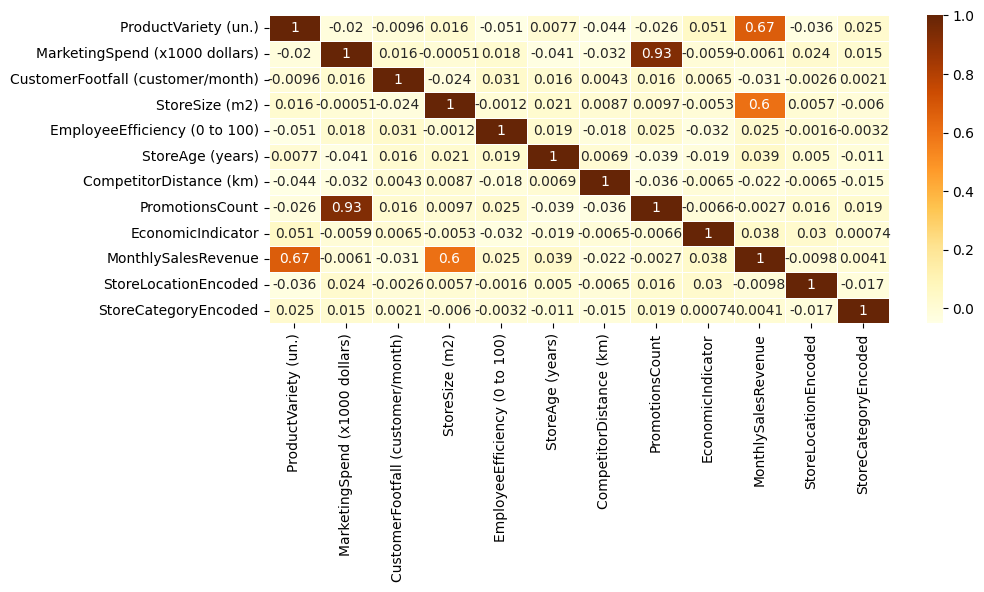

In [11]:
corr = data.corr(method='pearson')
fig = plt.subplots(figsize = (10, 4))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='YlOrBr',
            annot=True,
            linewidth=0.5)

From the heatmap it seems that MonthlySalesRevenue is positively correlated to the Store Size and the Product Variety

<Axes: >

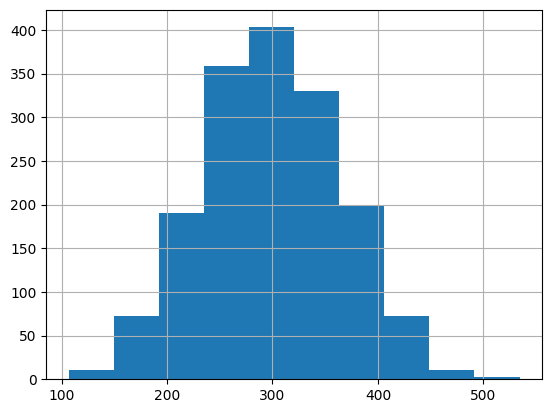

In [12]:
data.MonthlySalesRevenue.hist()

# 2. Objectives


**Objective: Analyse and predict the Monthly Sales Revenue** 

# 3. Linear Regression Models


#### Splitting Data

In [13]:
X = data.drop('MonthlySalesRevenue', axis=1)
y = data.MonthlySalesRevenue

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1155 samples.
Testing set has 495 samples.


In [15]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

#### Linear Regression

In [16]:
s = StandardScaler()
lr = LinearRegression()

In [17]:
X_train_s = s.fit_transform(X_train) #Fits StandardScaler to X_train and transforms it 
lr.fit(X_train_s, y_train) #Fits the LinearRegression model using X_train_s and y_train
X_test = s.transform(X_test) #Applies StandardScaler toX_test
y_pred = lr.predict(X_test) #Predicts  y for the test set (X_test)
score = r2_score(y_test.values, y_pred) #Calculates the R² score of the predictions (y_pred) compared to the actual values (y_test
score #without cross-validation

0.808359543746419

In [18]:
estimator = Pipeline([("scaler", s),("regression", lr)]) #Creates a pipeline
predictions_lr = cross_val_predict(estimator, X_train, y_train, cv=kf) #Performs cross-validation predictions
linear_score = r2_score(y_train, predictions_lr) #Calculates the R² score
linear_score #with cross-validation

0.8059346920383068

#### Lasso Regression

In [62]:
s = StandardScaler()
pf = PolynomialFeatures(degree=2)

In [63]:
scores = [] #List to store the R² scores
alphas = np.geomspace(0.03, 6.0, 20)
predictions_lsr = [] #List to store predictions for each alpha value

In [64]:
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    estimator = Pipeline([("scaler", s),("make_higher_degree", pf),("lasso_regression", las)])
    predictions_lsr = cross_val_predict(estimator, X_train, y_train, cv = kf)
    score = r2_score(y_train, predictions_lsr)
    scores.append(score)

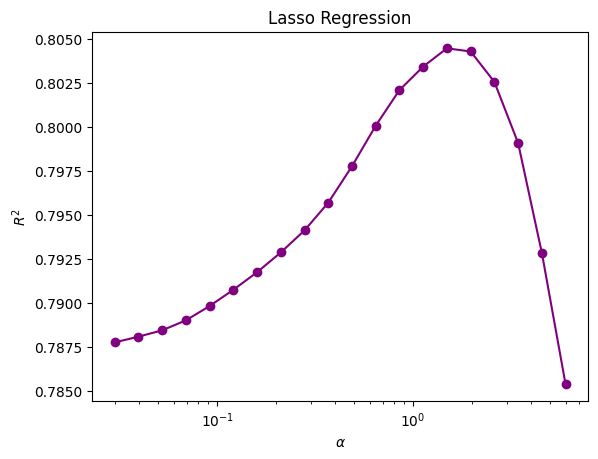

In [65]:
plt.semilogx(alphas, scores, '-o', color='purple')
plt.title('Lasso Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [75]:
best_estimator = Pipeline([("scaler", s),("make_higher_degree", PolynomialFeatures(degree=2)),("lasso_regression", Lasso(alpha=1.7))])
predictions_lsr_final = cross_val_predict(best_estimator, X_train, y_train, cv=kf)
lasso_score = r2_score(y_train, predictions_lsr_final)
#best_estimator.fit(X_train, y_train)
#lasso_score = best_estimator.score(X_train, y_train)
lasso_score

0.8046145727313514

#### Ridge Regression

In [112]:
pf = PolynomialFeatures(degree=1)
alphas = np.geomspace(0.03, 4, 20)
scores=[]
predictions_rr = []

In [113]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)
    estimator = Pipeline([("scaler", s),("polynomial_features", pf),("ridge_regression", ridge)])
    predictions_rr = cross_val_predict(estimator, X_train, y_train, cv = kf)
    score = r2_score(y_train, predictions_rr)
    scores.append(score)

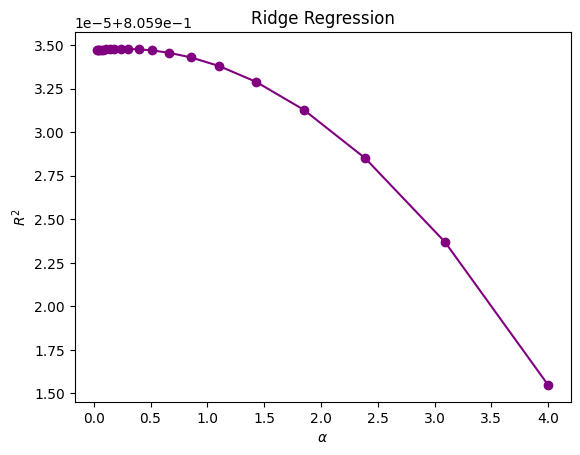

In [114]:
plt.plot(alphas, scores, '-o', color='purple')
plt.title('Ridge Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [115]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=1)),
                    ("ridge_regression", Ridge(alpha=0.03))])

predictions_rr_final = cross_val_predict(best_estimator, X_train, y_train, cv=kf)
ridge_score = r2_score(y_train, predictions_rr_final)
#best_estimator.fit(X_train, y_train)
#ridge_score = best_estimator.score(X_train, y_train)
ridge_score

0.8059347130441582

In [116]:
# comparing scores
pd.DataFrame([[linear_score, lasso_score, ridge_score]],columns=['linear', 'lasso', 'ridge'], index=['score'])

,linear,lasso,ridge
score,0.805935,0.804615,0.805935


# 4. Insights and key findings


**Conclusion:** All the results of the regression methods were similar

# 5. Next Steps


We could further try optimize Lasso using GridSearchCV.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
